In [615]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [28]:
#Load the data 
df=pd.read_csv(r"D:\ML\Final_Work\Oral_Cancer_Data.csv")

In [29]:

df.head()

,No,Group,1,2,3,4,5,6,7,8,...,5565,5566,5567,5568,5569,5570,5571,5572,5573,5574
0,rt,NaN,53.631038,53.766960,53.631038,53.787167,53.639549,54.589487,55.294938,55.235643,...,699.178440,699.418620,698.346840,708.771000,713.471940,734.055600,751.732920,756.554220,769.092000,768.823500
1,rt_corrected,NaN,120.406546,120.406570,120.864469,120.896613,120.994330,121.326153,122.053864,122.442440,...,1778.922718,1779.740295,1779.746914,1788.608324,1794.861187,1813.373145,1832.070433,1836.282537,1848.879140,1849.048792
2,mz_light,NaN,403.063893,488.117029,495.203438,512.094762,501.116084,375.078311,760.210702,407.139470,...,454.241775,533.279392,489.315280,515.332075,604.355055,312.326072,602.435852,517.345344,673.423537,629.396420
3,mz_heavy,NaN,405.070832,490.123696,497.210275,516.108300,505.128869,377.084791,762.217574,409.146127,...,456.248579,535.286235,491.321972,517.336926,606.362066,314.332610,604.442332,519.352219,675.429911,631.402960
4,mono_mass,NaN,169.005563,254.058699,261.145108,44.985382,34.006704,141.019982,526.152372,173.081140,...,220.183445,299.221062,255.256950,281.273745,370.296725,78.267742,368.377522,283.287014,439.365207,395.338090


In [32]:
df.drop(index=range(0,9),axis=1, inplace=True)

In [33]:
df.head()

,No,Group,1,2,3,4,5,6,7,8,...,5565,5566,5567,5568,5569,5570,5571,5572,5573,5574
9,IsoMS_results_BN_1_converted.csv,BN,1.998,0.669,1.271,1.447,0.633,0.027,0.739,4.299,...,1.031,0.277,0.284,0.294,2.411,9.999,0.245,0.307,1.484,1.752
10,IsoMS_results_BN_2_converted.csv,BN,3.361,0.413,0.484,1.474,1.218,0.051,0.847,4.343,...,1.543,0.452,0.377,0.391,2.003,4.186,0.172,0.252,NaN,NaN
11,IsoMS_results_BN_3_converted.csv,BN,1.043,0.722,0.755,0.780,0.175,0.079,4.528,0.460,...,1.285,0.156,0.119,0.178,0.104,3.280,0.287,0.127,0.073,0.093
12,IsoMS_results_BN_4_converted.csv,BN,1.272,0.085,0.566,1.260,0.967,0.050,0.329,3.780,...,1.133,0.412,0.489,0.135,0.487,4.347,0.234,0.626,0.528,0.621
13,IsoMS_results_BN_5_converted.csv,BN,0.608,0.558,0.921,NaN,0.352,0.052,6.056,0.462,...,0.376,0.430,0.423,0.629,0.317,3.441,0.863,0.690,NaN,NaN


In [36]:
df=df.fillna(df.iloc[:,2:5576].mean())

In [37]:
df=df.dropna(axis=1)

In [72]:
df.shape

(41, 5575)

In [74]:
df2=df.iloc[:,2:5575]
df_50_features=df.iloc[:,2:52]
df_50_features.isnull().values.any()

False

In [50]:
correlation_matrix=df_50_features.corr()

<Axes: >

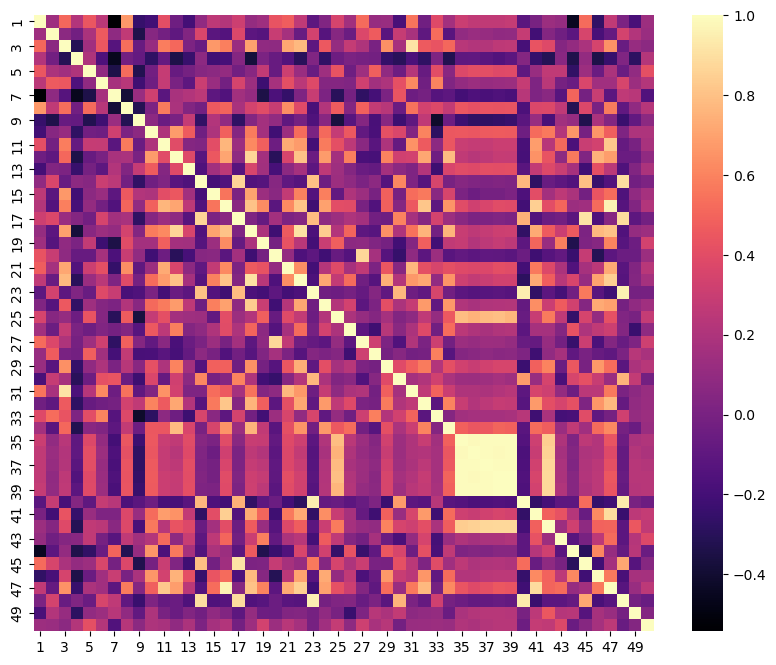

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap="magma")

<Axes: >

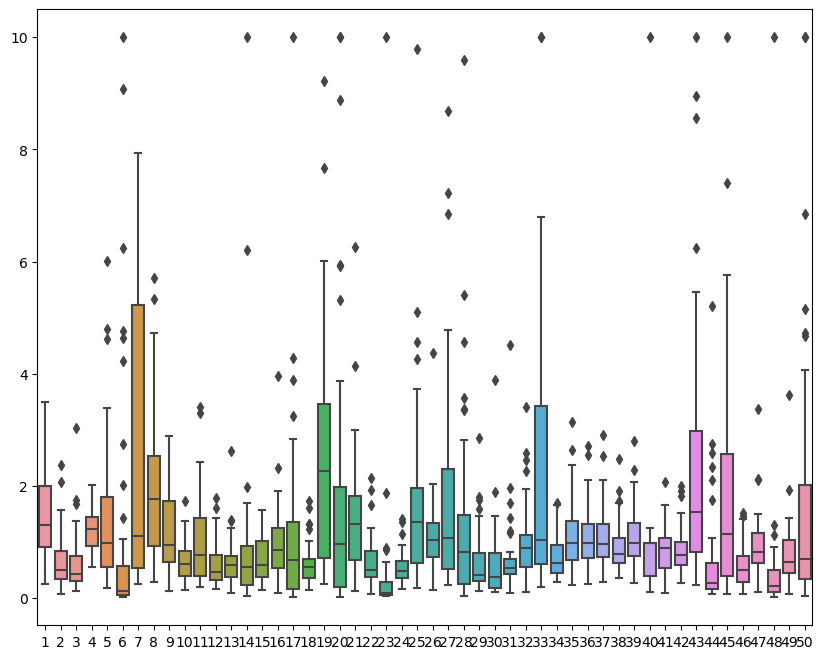

In [66]:
plt.figure(figsize=(10,8))
sns.boxplot(df_50_features)

In [70]:
Scaler=StandardScaler()

In [84]:
df_standarize=pd.DataFrame(Scaler.fit_transform(df2))

<Axes: >

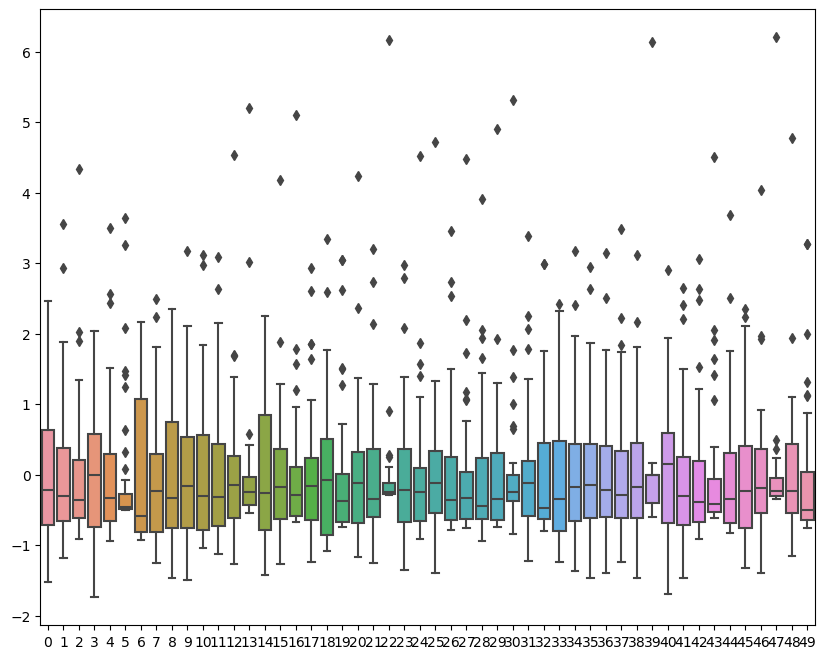

In [92]:
plt.figure(figsize=(10,8))
df_standarize
df_standarize_50_features=df_standarize.iloc[:,0:50]
sns.boxplot(df_standarize_50_features)

In [457]:
#PCA
y=df["Group"]
y=y.reset_index()
y=y["Group"]
X=df_standarize
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)


In [459]:
df_pca=pd.DataFrame(data=X_pca,columns=["PC1","PC2","PC3"])
df_pca["Label"]=y
df_pca.head()

,PC1,PC2,PC3,Label
0,15.915650,-31.768705,8.748281,BN
1,-24.202427,-5.704937,-4.553468,BN
2,3.106565,-11.489317,-28.146359,BN
3,-10.892911,-6.976505,-10.625052,BN
4,97.445315,-68.768800,-17.889021,BN


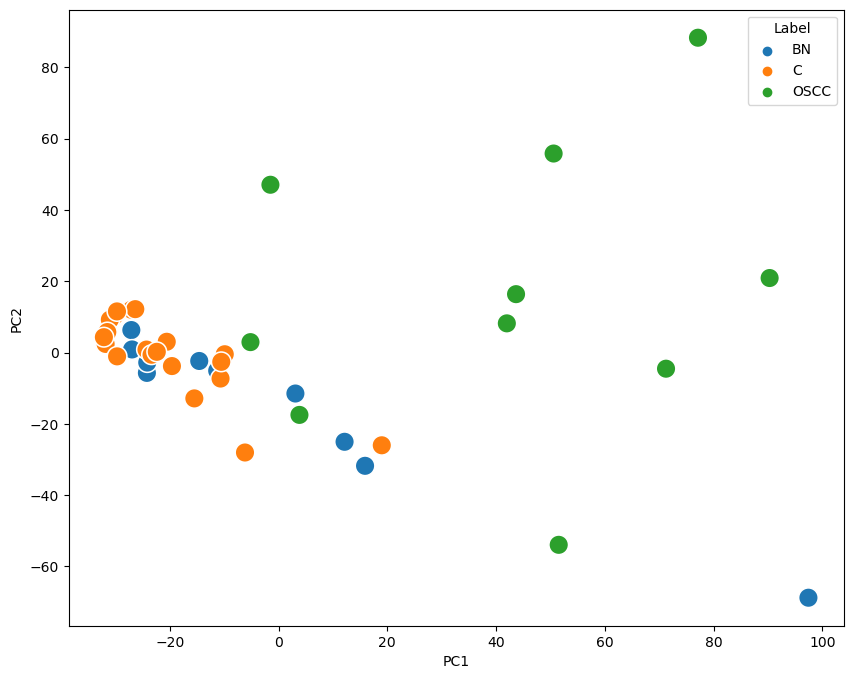

In [461]:
plt.figure(figsize=(10,8))
scatter=sns.scatterplot(x=df_pca["PC1"],y=df_pca["PC2"],hue=df_pca["Label"],s=200)

In [ ]:
y=y.tolist()

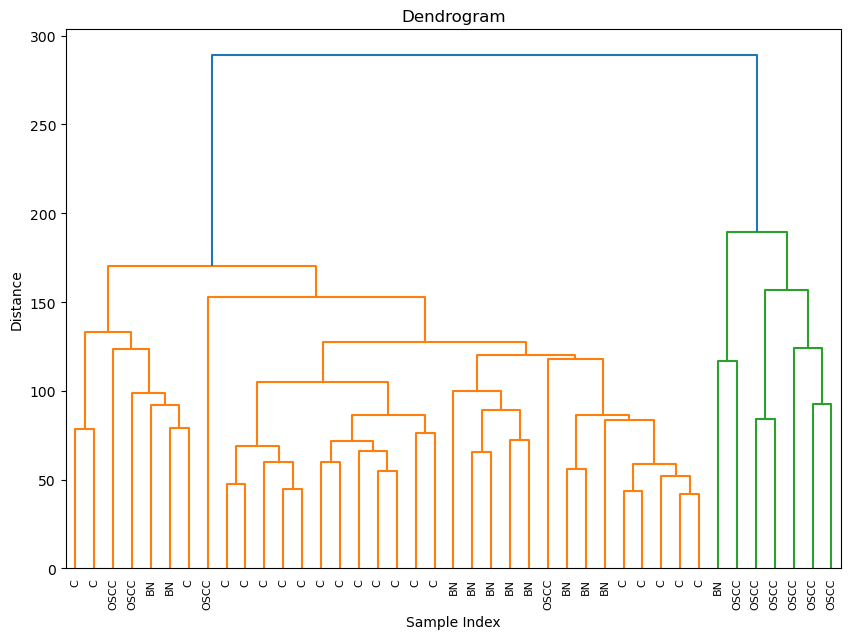

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 3, 1, 3, 1, 3],
      dtype=int32)

In [509]:
#Clustering method
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,labels=y)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()
labels_1=fcluster(linkage_matrix, t=3, criterion='maxclust')
labels_1

In [683]:
label1=pd.DataFrame(labels_1,columns=["Predicted_Label"])
df_label=pd.DataFrame(y,labels_1)
df_label=df_label.reset_index()
df_label.columns=["Predicted_Label","Actual_Label"]
df_label[df_label["Actual_Label"]=="BN"].value_counts()
df_label[df_label["Actual_Label"]=="C"].value_counts()
df_label[df_label["Actual_Label"]=="OSCC"].value_counts()
dic={
    1:"C",
    2:"BN",
    3:"OSCC"
}

df_label['Assigned_Label']=label1["Predicted_Label"].map(dic)
acc_score=accuracy_score(df_label["Actual_Label"],df_label["Assigned_Label"])
acc_score

0.6341463414634146

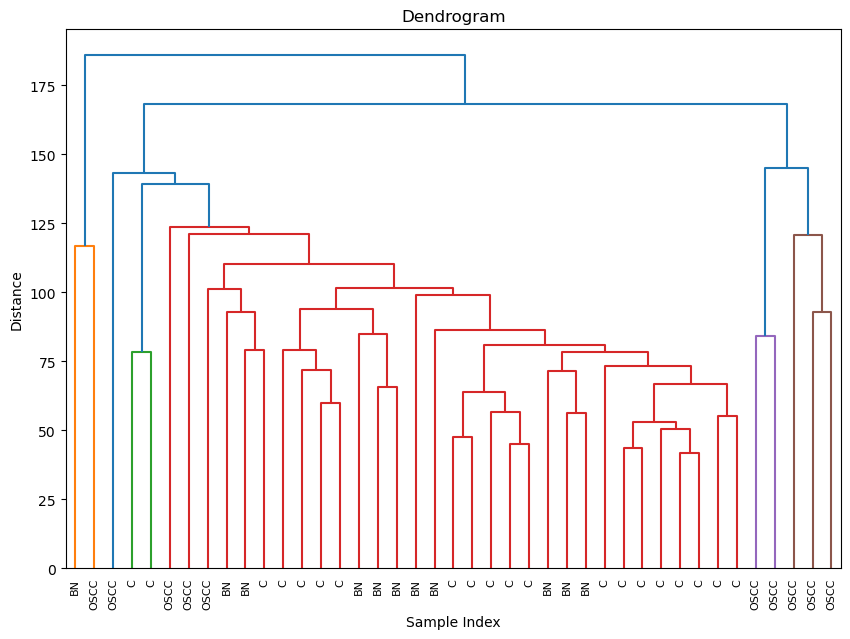

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 3, 2, 3, 2, 3],
      dtype=int32)

In [661]:
linkage_matrix = linkage(X, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,labels=y)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()
labels_2=fcluster(linkage_matrix, t=3, criterion='maxclust')
labels_2

In [709]:
label2=pd.DataFrame(labels_2,columns=["Predicted_Label"])

df_label_2=pd.DataFrame(y,labels_2)
df_label_2=df_label_2.reset_index()
df_label_2.columns=["Predicted_Label","Actual_Label"]
df_label_2[df_label_2["Actual_Label"]=="BN"].value_counts()
df_label_2[df_label_2["Actual_Label"]=="C"].value_counts()
df_label_2[df_label_2["Actual_Label"]=="OSCC"].value_counts()
dic={
    1:"C",
    2:"BN",
    3:"OSCC"
}

df_label_2['Assigned_Label']=label2["Predicted_Label"].map(dic)
acc_score=accuracy_score(df_label_2["Actual_Label"],df_label_2["Assigned_Label"])
acc_score


0.36585365853658536

In [711]:
#K-means
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
labels_3 = kmeans.labels_
label3=pd.DataFrame(labels_3,columns=["Predicted_Label"])
df_label_3=pd.DataFrame(y,labels_3)
df_label_3=df_label_3.reset_index()
df_label_3.columns=["Predicted_Label","Actual_Label"]
df_label_3[df_label_3["Actual_Label"]=="BN"].value_counts()
df_label_3[df_label_3["Actual_Label"]=="C"].value_counts()
df_label_3[df_label_3["Actual_Label"]=="OSCC"].value_counts()
dic={
    0:"C",
    1:"BN",
    2:"OSCC"
}

df_label_3['Assigned_Label']=label3["Predicted_Label"].map(dic)
acc_score=accuracy_score(df_label_3["Actual_Label"],df_label_3["Assigned_Label"])
acc_score


C:\Users\LiangNewPC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LiangNewPC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.5853658536585366